# 5/21/2020
# This notebook begins Autoz/LinKS study. I merge LinKS and autoz catalogs.
link to autoz catalog:
http://www.gama-survey.org/dr3/schema/table.php?id=24

In [9]:
# libraries

import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load in LinKS files from paper (initial and final selections, should be 421 and 47)
links = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama_withgamaid.csv')
# drop null values (found this out after dealing with it for a minute)
# must have been objects that didn't match the gama catalog
links = links.dropna()
links_identified = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')

print(len(links), len(links_identified))

305 47


In [11]:
# load in fits file, extract as table, make dataframe

autozfits = fits.open('/home/shawn/Desktop/LinKS_autoz/files/fits/autoz.fits')  # open a FITS file
autozfits.verify('fix')
autoz = autozfits[1].data  # assume the first extension is a table
print(autoz.columns)

# create series for each column
GAMA_ID = autoz.CATAID
# first redshift peak and template
z1 = autoz.Z
sigma1 = autoz.CC_SIGMA
template1 = autoz.TEMPLATE
# second redshift peak and template
z2 = autoz.Z2
sigma2 = autoz.CC_SIGMA2
template2 = autoz.TEMPLATE2
# probability and error (Uncertainty in redshift, given as a velocity, delta c ln(1+z))
prob = autoz.PROB
error = autoz.VEL_ERR

# zip series to array
autoz = list(zip(GAMA_ID, z1, sigma1, template1, z2, sigma2, template2, prob, error))

# create dataframe
autoz = pd.DataFrame(autoz, columns = ['GAMA_ID', 
                                       'z1', 
                                       'sigma1', 
                                       'template1', 
                                       'z2', 
                                       'sigma2', 
                                       'template2', 
                                       'prob', 
                                       'error'])

autoz['template1'] = autoz.template1.astype(int)
autoz['template2'] = autoz.template2.astype(int)

print(autoz.columns)
print(len(autoz))

ColDefs(
    name = 'SPECID'; format = '15A'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'CATAID'; format = 'J'; null = -2147483648
    name = 'COUNT_BADPIXEL'; format = 'I'; null = -32768
    name = 'COUNT_HIGHVAL'; format = 'I'; null = -32768
    name = 'COUNT_LOWVAL'; format = 'I'; null = -32768
    name = 'RMS_MAD_RATIO'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'CC_SIGMA'; format = 'E'
    name = 'TEMPLATE'; format = 'I'; null = -32768
    name = 'Z2'; format = 'E'
    name = 'CC_SIGMA2'; format = 'E'
    name = 'TEMPLATE2'; format = 'I'; null = -32768
    name = 'CC_SIGMA3'; format = 'E'
    name = 'CC_SIGMA4'; format = 'E'
    name = 'CC_SIGMA1TO234'; format = 'E'
    name = 'CC_FOM'; format = 'E'
    name = 'PROB'; format = 'E'
    name = 'VEL_ERR'; format = 'E'; unit = 'km/s'
)
Index(['GAMA_ID', 'z1', 'sigma1', 'template1', 'z2', 'sigma2', 'template2',
       'prob', 'error'],
      dtype='object')
166332


In [12]:
# merge links catalogs with autoz

links = pd.merge(links, autoz, how = 'left', on = 'GAMA_ID')
links_identified = pd.merge(links_identified, autoz, how = 'left', on = 'GAMA_ID')

print(len(links))
print(len(links_identified))

348
51


In [21]:
# so there are duplicates...?

duplicates = []

for i in range(len(links)):
    if links.duplicated(['GAMA_ID'])[i] == True:
        #print(links.GAMA_ID[i])
        duplicates.append(links.GAMA_ID[i])
    else:
        pass

for i in range(len(duplicates)):
    print(links[links.GAMA_ID == duplicates[i]])

    
# this isn't good code.


   Unnamed: 0    GAMA_ID      ID         RA      DEC  SCORE        z1  \
4           4  3629152.0  1933.0  135.88864 -0.97487   26.0  0.406623   
5           4  3629152.0  1933.0  135.88864 -0.97487   26.0  0.405813   

     sigma1  template1        z2    sigma2  template2      prob      error  
4  4.328009       40.0  0.787118  3.691353       40.0  0.792829  87.774857  
5  4.959480       40.0  0.788378  3.122938       42.0  0.968271  78.940247  
    Unnamed: 0    GAMA_ID      ID         RA      DEC  SCORE        z1  \
9            9  3911769.0  1704.0  138.66089 -1.11639   20.0  0.279525   
10           9  3911769.0  1704.0  138.66089 -1.11639   20.0  0.279322   

       sigma1  template1        z2    sigma2  template2  prob      error  
9    9.453354       40.0 -0.000194  3.075279        7.0   1.0  45.140915  
10  10.793142       40.0  0.681879  3.501179       45.0   1.0  42.618690  
    Unnamed: 0    GAMA_ID      ID         RA      DEC  SCORE        z1  \
16          15  3891172.0  

328  4.188629       43.0  0.370643  3.934723       40.0  0.106919  75.084015  
     Unnamed: 0   GAMA_ID    ID         RA      DEC  SCORE        z1  \
333         412  497075.0  11.0  214.28033 -1.10181    4.0  0.413614   
334         412  497075.0  11.0  214.28033 -1.10181    4.0  0.302655   
335         412  497075.0  11.0  214.28033 -1.10181    4.0  0.441678   
336         412  497075.0  11.0  214.28033 -1.10181    4.0  0.413782   

       sigma1  template1        z2    sigma2  template2      prob       error  
333  7.415225       42.0  0.532177  3.753512       40.0  0.999501   58.323227  
334  6.058045       44.0  0.272830  5.716598       46.0  0.405106   62.531170  
335  3.039053       42.0  0.030432  2.954432       47.0  0.131425  130.556732  
336  8.068773       40.0  0.153219  2.902236       46.0  0.999996   51.606346  
     Unnamed: 0   GAMA_ID    ID         RA      DEC  SCORE        z1  \
333         412  497075.0  11.0  214.28033 -1.10181    4.0  0.413614   
334         412 

In [125]:
# It appears the duplicates are two separate measurements in autoz.
# some of these are close in z2, while some are very off.


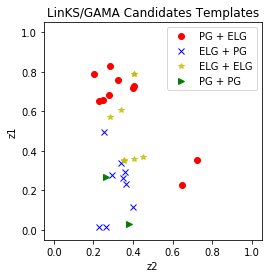

In [184]:
# Templates 40-42 are PG and 43-47 are ELG
# We want candidates with Z = z1 = 40-42 and z2 = 43-47 or Z = z2 = 40-42 and z1 = 43-47

# initial plot to see links_identified with templates

lid = links_identified

pg_elg1 = lid[(lid.z1 < lid.z2) & (lid.template1 >=40) & (lid.template1 <= 42) 
             & (lid.template2 > 42) & (lid.template2 <= 47)]
pg_elg2 = lid[(lid.z1 > lid.z2) & (lid.template2 >=40) & (lid.template2 <= 42)
             & (lid.template1 > 42) & (lid.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])

elg_pg1 = lid[(lid.z1 < lid.z2) & (lid.template2 >=40) & (lid.template2 <= 42)
             & (lid.template1 > 42) & (lid.template1 <= 47)]
elg_pg2 = lid[(lid.z1 > lid.z2) & (lid.template1 >=40) & (lid.template1 <= 42)
             & (lid.template2 > 42) & (lid.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])

elg_elg = lid[(lid.template2 >= 40) & (lid.template2 <= 42) & (lid.template1 >=40 ) & (lid.template1 <= 42)]
pg_pg = lid[(lid.template1 > 42) & (lid.template2 <= 47) & (lid.template2 > 42) & (lid.template2 <= 47)]

#plot
fig, ax = plt.subplots()
ax.plot(pg_elg.z1, pg_elg.z2, 'ro', label = 'PG + ELG')
ax.plot(elg_pg.z1, elg_pg.z2, 'bx', label = 'ELG + PG')
ax.plot(elg_elg.z1, elg_elg.z2, 'y*', label = 'ELG + ELG', alpha = 0.75)
ax.plot(pg_pg.z1, pg_pg.z2, 'g>', label = 'PG + PG')
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect(1)
ax.legend()
ax.set(title = 'LinKS/GAMA Candidates Templates',
      ylabel = 'z1',
      xlabel = 'z2')

#plt.savefig('/home/shawn/Desktop/LinKS_autoz/links_candidate_templates.png')

In [5]:
links.to_csv('/home/shawn/Desktop/LinKS_autoz/files/csv/links_autoz052220.csv')
links_identified.to_csv('/home/shawn/Desktop/LinKS_autoz/files/csv/links_identified_autoz052220.csv')